<a href="https://colab.research.google.com/github/mukesh527/MLApp/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sales Prediction Model File**

# Reading & Analysing Data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install geopandas

**Reading input data**

In [30]:
import pandas as pd
import numpy as np
#import geopandas as gpd

import matplotlib.pyplot as plt

Function to Reduce Dataframe memory

In [ ]:
#***** Function to reduce dataframe memory**************************************#

def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

#*******************************************************************************************************

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Final Hack/train.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train.head()


,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


In [ ]:
#train['date'] =  pd.to_datetime(train['date'], format='%Y-%m-%d')
train['locationId']=train['locationId'].astype('category')
train['item_id']=train['item_id'].astype('category')
train['onpromotion']=train['onpromotion'].astype('category')

In [ ]:
train, NAlist = reduce_mem_usage(train)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 1551.8366165161133  MB
******************************
Column:  date
dtype before:  datetime64[ns]


TypeError: ignored

In [ ]:
#train.groupby(['locationId'])['unit_sales'].sum()

for i in train.locationId.unique():
  print (i)

location_25
location_1
location_2
location_3
location_4
location_5
location_6
location_7
location_8
location_9
location_10
location_11
location_12
location_13
location_14
location_15
location_16
location_17
location_18
location_19
location_23
location_24
location_26
location_27
location_28
location_30
location_31
location_32
location_33
location_34
location_35
location_37
location_38
location_39
location_40
location_41
location_43
location_44
location_45
location_46
location_47
location_48
location_49
location_50
location_51
location_54
location_36
location_53
location_20
location_29
location_21
location_42
location_22


In [ ]:

#t+str.split(i,'_')[1]
li=[train.loc[train['locationId']==i] for i in train.locationId.unique()]
# for i in train.locationId.unique():

#   li=train.loc[train['locationId']==i]
  


In [ ]:
len(li)

53

In [ ]:
location=pd.read_csv('/content/drive/MyDrive/Final Hack/location_details.csv')
item_id=pd.read_csv('/content/drive/MyDrive/Final Hack/item_details.csv')
transaction_train=pd.read_csv('/content/drive/MyDrive/Final Hack/train_transactions.csv')

In [ ]:
location.groupby(['cluster'])['state'].sum()
#location.head()

cluster
1                     MaharashtraUttar PradeshKarnataka
2                                    TelanganaTelangana
3     NCRMaharashtraMaharashtraTamil NaduAndhra Prad...
4                                 NCRGujaratMaharashtra
5                                             Karnataka
6     KarnatakaWest BengalKarnatakaNCRMaharashtraTel...
7                                     ChimborazoGujarat
8                           KarnatakaKarnatakaKarnataka
9                                      KarnatakaHaryana
10    MaharashtraMaharashtraMaharashtraMaharashtraAn...
11                         KarnatakaKarnatakaTamil Nadu
12                                            Karnataka
13                KarnatakaKarnatakaKarnatakaTamil Nadu
14                   KarnatakaKarnatakaKarnatakaHaryana
15    KarnatakaUttar PradeshUttar PradeshGujaratMadh...
16                                            Karnataka
17                                          Maharashtra
Name: state, dtype: object

In [ ]:
item_id.head()

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


In [ ]:
transaction_train.head()

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


**Task 1 : Aggregate/Merge all data to train dataframe**

In [ ]:
# train_chunk1=pd.merge(t1,location,how='left',left_on='locationId',right_on='location_id').drop(['location_id'],axis=1)
# train_chunk1.cluster.value_counts()
train_chunks=pd.merge(li[0],location,how='left',left_on='locationId',right_on='location_id').drop(['location_id'],axis=1)

# Using BigData

In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz

!pip install -q findspark

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [6]:
import findspark
findspark.init()

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Spark ML Application")\
        .master('local[*]')\
        .getOrCreate()

In [8]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [9]:
TrainDataSchema = StructType([
    StructField("date", TimestampType(), True),
    StructField("locationId", StringType(), True),
    StructField("item_id", StringType(), True),
    StructField("unit_sales", DoubleType(), True),
    StructField("onpromotion", BooleanType(), True),])

In [12]:
train = spark.read.csv(path='/content/drive/MyDrive/Final_Hack/train.csv',header=True,schema=TrainDataSchema)





In [13]:
location=spark.read.csv(path='/content/drive/MyDrive/Final_Hack/location_details.csv',header=True,inferSchema=True)
item_id=spark.read.csv(path='/content/drive/MyDrive/Final_Hack/item_details.csv',header=True,inferSchema=True)
transactions=spark.read.csv(path='/content/drive/MyDrive/Final_Hack/train_transactions.csv',header=True,inferSchema=True)

In [14]:
train.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- locationId: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- unit_sales: double (nullable = true)
 |-- onpromotion: boolean (nullable = true)



In [80]:
train.show(5)

+-------------------+-----------+-----------+----------+-----------+
|               date| locationId|    item_id|unit_sales|onpromotion|
+-------------------+-----------+-----------+----------+-----------+
|2015-01-01 00:00:00|location_25|item_103665|       7.0|       null|
|2015-01-01 00:00:00|location_25|item_105574|       1.0|       null|
|2015-01-01 00:00:00|location_25|item_105575|       2.0|       null|
|2015-01-01 00:00:00|location_25|item_108079|       1.0|       null|
|2015-01-01 00:00:00|location_25|item_108701|       1.0|       null|
+-------------------+-----------+-----------+----------+-----------+
only showing top 5 rows



In [15]:
location=location.withColumnRenamed('location_id','locationId')
#location.show(5)

In [16]:
df1=train.join(other=location,on='locationId',how='left')

In [17]:
#df1.show(5)

In [18]:
#item_id.show(5)

In [19]:
df2=df1.join(other=item_id,on='item_id',how='left')
#df2.show(5)

In [ ]:
print(train.count())
print(df2.count())

In [ ]:
print(df1.count())

In [ ]:
#transactions.show(5)

In [20]:
transactions=transactions.withColumnRenamed('location_identifier','locationId')
#transactions.show(5)

In [21]:
df3=df2.join(transactions,on=['date','locationId'],how='left')

In [88]:
df3.show(5)

+-------------------+-----------+-----------+----------+-----------+------+-------------+----+-------+--------------------+----------+----------+------------+
|               date| locationId|    item_id|unit_sales|onpromotion|  city|        state|type|cluster|    category_of_item|     class|perishable|transactions|
+-------------------+-----------+-----------+----------+-----------+------+-------------+----+-------+--------------------+----------+----------+------------+
|2015-01-01 00:00:00|location_25|item_103665|       7.0|       null|Kanpur|Uttar Pradesh|   D|      1|baked_items / bre...|class_2712|         1|         770|
|2015-01-01 00:00:00|location_25|item_105574|       1.0|       null|Kanpur|Uttar Pradesh|   D|      1|       grocery_items|class_1045|         0|         770|
|2015-01-01 00:00:00|location_25|item_105575|       2.0|       null|Kanpur|Uttar Pradesh|   D|      1|       grocery_items|class_1045|         0|         770|
|2015-01-01 00:00:00|location_25|item_108079| 

In [ ]:
df3.groupby('date','locationId').sum('unit_sales').show()

**Subsetting only for one Item among 4000 items**

In [22]:
# df_item_103665=df3.where(df3('item_id')='item_103665')
df_item_103665=df3.filter(df3.item_id == "item_103665")

In [ ]:
df_item_103665.show()

**Converting spark Dataframe to Pandas Dataframe for faster Analysis**

In [23]:
pdf_item_103665=df_item_103665.toPandas()

In [24]:
pdf_item_103665.shape

(43256, 13)

In [93]:
#pdf_item_103665.to_pickle(path='/content/drive/MyDrive/Final_Hack/dataframe')

In [25]:
pdf_item_103665['year']=pdf_item_103665['date'].dt.year
pdf_item_103665['month']=pdf_item_103665['date'].dt.month

In [26]:
pdf_item_103665.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,transactions,year,month
0,2015-01-01,location_25,item_103665,7.0,None,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,770.0,2015,1
1,2015-01-02,location_1,item_103665,2.0,None,Bengaluru,Karnataka,D,13,baked_items / bread_based,class_2712,1,2111.0,2015,1
2,2015-01-02,location_2,item_103665,5.0,None,Bengaluru,Karnataka,D,13,baked_items / bread_based,class_2712,1,2358.0,2015,1
3,2015-01-02,location_3,item_103665,6.0,None,Bengaluru,Karnataka,D,8,baked_items / bread_based,class_2712,1,3487.0,2015,1
4,2015-01-02,location_4,item_103665,2.0,None,Bengaluru,Karnataka,D,9,baked_items / bread_based,class_2712,1,1922.0,2015,1


**Subsetting Year wise sales for Item_id = item_103665**

In [32]:
# pdf_2015=pdf_item_103665[pdf_item_103665['year']==2015]
# pdf_2016=pdf_item_103665[pdf_item_103665['year']==2016]
# pdf_2017=pdf_item_103665[pdf_item_103665['year']==2017]
# pdf_2018=pdf_item_103665[pdf_item_103665['year']==2018]
# pdf_2015.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,transactions,year,month
0,2015-01-01,location_25,item_103665,7.0,None,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,770.0,2015,1
1,2015-01-02,location_1,item_103665,2.0,None,Bengaluru,Karnataka,D,13,baked_items / bread_based,class_2712,1,2111.0,2015,1
2,2015-01-02,location_2,item_103665,5.0,None,Bengaluru,Karnataka,D,13,baked_items / bread_based,class_2712,1,2358.0,2015,1
3,2015-01-02,location_3,item_103665,6.0,None,Bengaluru,Karnataka,D,8,baked_items / bread_based,class_2712,1,3487.0,2015,1
4,2015-01-02,location_4,item_103665,2.0,None,Bengaluru,Karnataka,D,9,baked_items / bread_based,class_2712,1,1922.0,2015,1


In [46]:
# pdf_2015=pdf_2015.set_index(['date'])
# pdf_2015.index=pd.to_datetime(pdf_2015.index,unit='s')
# pdf_2016=pdf_2016.set_index(['date'])
# pdf_2016.index=pd.to_datetime(pdf_2016.index,unit='s')
# pdf_2017=pdf_2017.set_index(['date'])
# pdf_2017.index=pd.to_datetime(pdf_2017.index,unit='s')
# pdf_2018=pdf_2018.set_index(['date'])
# pdf_2018.index=pd.to_datetime(pdf_2018.index,unit='s')
pdf_item_103665=pdf_item_103665.set_index(['date'])
pdf_item_103665.index=pd.to_datetime(pdf_item_103665.index,unit='s')

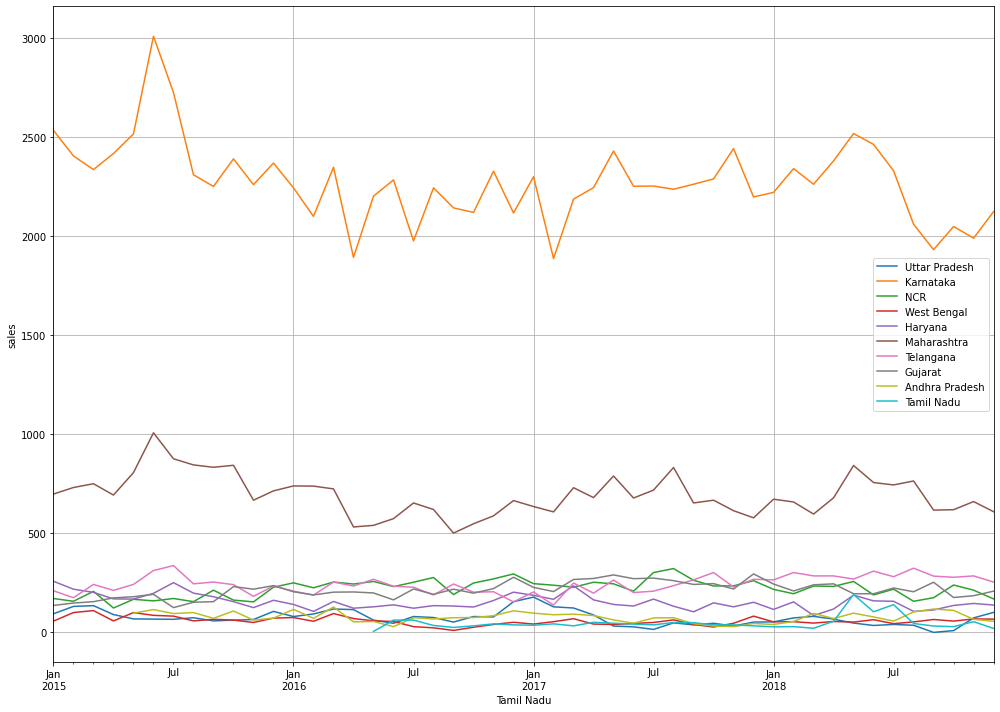

In [60]:
num_states = len(pdf_item_103665['state'].unique())
fig, axes = plt.subplots( figsize=(14, 10))

flag=0
for s in pdf_item_103665['state'].unique():
    # t1 = pdf_2015.loc[pdf_2015['state'] == s, 'unit_sales'].resample('M').sum()
    # t2 = pdf_2016.loc[pdf_2016['state'] == s, 'unit_sales'].resample('M').sum()
    # t3 = pdf_2017.loc[pdf_2017['state'] == s, 'unit_sales'].resample('M').sum()
    # t4 = pdf_2018.loc[pdf_2018['state'] == s, 'unit_sales'].resample('M').sum()
    # ax1 = t1.plot(ax=axes[flag],c='green')  
    # ax2 = t2.plot(ax=axes[flag],c='red') 
    # ax3 = t3.plot(ax=axes[flag],c='blue') 
    # ax4 = t4.plot(ax=axes[flag],c='magenta')  
    # #ax = t.plot(ax=axes[flag],c='green')
    # ax1.grid()
    # ax1.set_xlabel(s)
    # ax1.set_ylabel('sales')
    # ax2.grid()
    # ax2.set_xlabel(s)
    # ax2.set_ylabel('sales')
    # ax3.grid()
    # ax3.set_xlabel(s)
    # ax3.set_ylabel('sales')
    # ax4.grid()
    # ax4.set_xlabel(s)
    # ax4.set_ylabel('sales')
    t = pdf_item_103665.loc[pdf_item_103665['state'] == s, 'unit_sales'].resample('M').sum()
    ax = t.plot(label=s) 
    ax.grid()
    ax.set_xlabel(s)
    ax.set_ylabel('sales')
    ax.legend()
    flag=flag+1
fig.tight_layout();